In [16]:
###데이터의 관계의 정도(피어슨 계수) 알아보기

import seaborn as sns #타이타닉csv 파일 가져오기
import pandas as pd

titanic = sns.load_dataset("titanic")

titanic['age'] = titanic['age'].fillna(titanic['age'].median()) #중간값
#value_counts()로 값들을 set처럼 가져옴
titanic['embarked'] = titanic['embarked'].fillna('S')
titanic['embark_town'] = titanic['embark_town'].fillna('Southampton')
titanic['deck'] = titanic['deck'].fillna('C')
# titanic.isnull().sum() #결측값 확인
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,C,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,C,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


Text(0.5, 1.0, 'female')

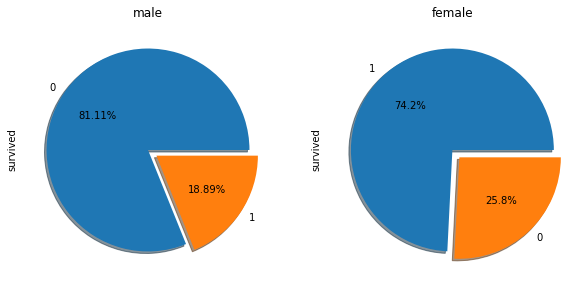

In [11]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, 2, figsize=(10, 5)) #f가 합쳐진 함수, ax는 축, subplots는 여러 함수 합치는 거
#plt가 아니라 바로 titanic df 객체의 value_counts()를 plot하네 -> pandas에도 plt메소드가 있음
titanic['survived'][titanic['sex']=='male'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.2f%%', ax=ax[0], shadow=True)
titanic['survived'][titanic['sex']=='female'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[1], shadow=True)
ax[0].set_title('male')
ax[1].set_title('female')

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


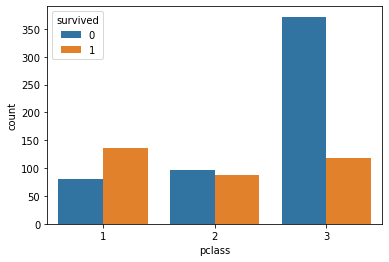

In [18]:
sns.countplot('pclass', hue = 'survived',data=titanic) #막대 그래프로 카테고리('pclass')별 데이터를 보여줌 hue가 종속 변수
plt.show()

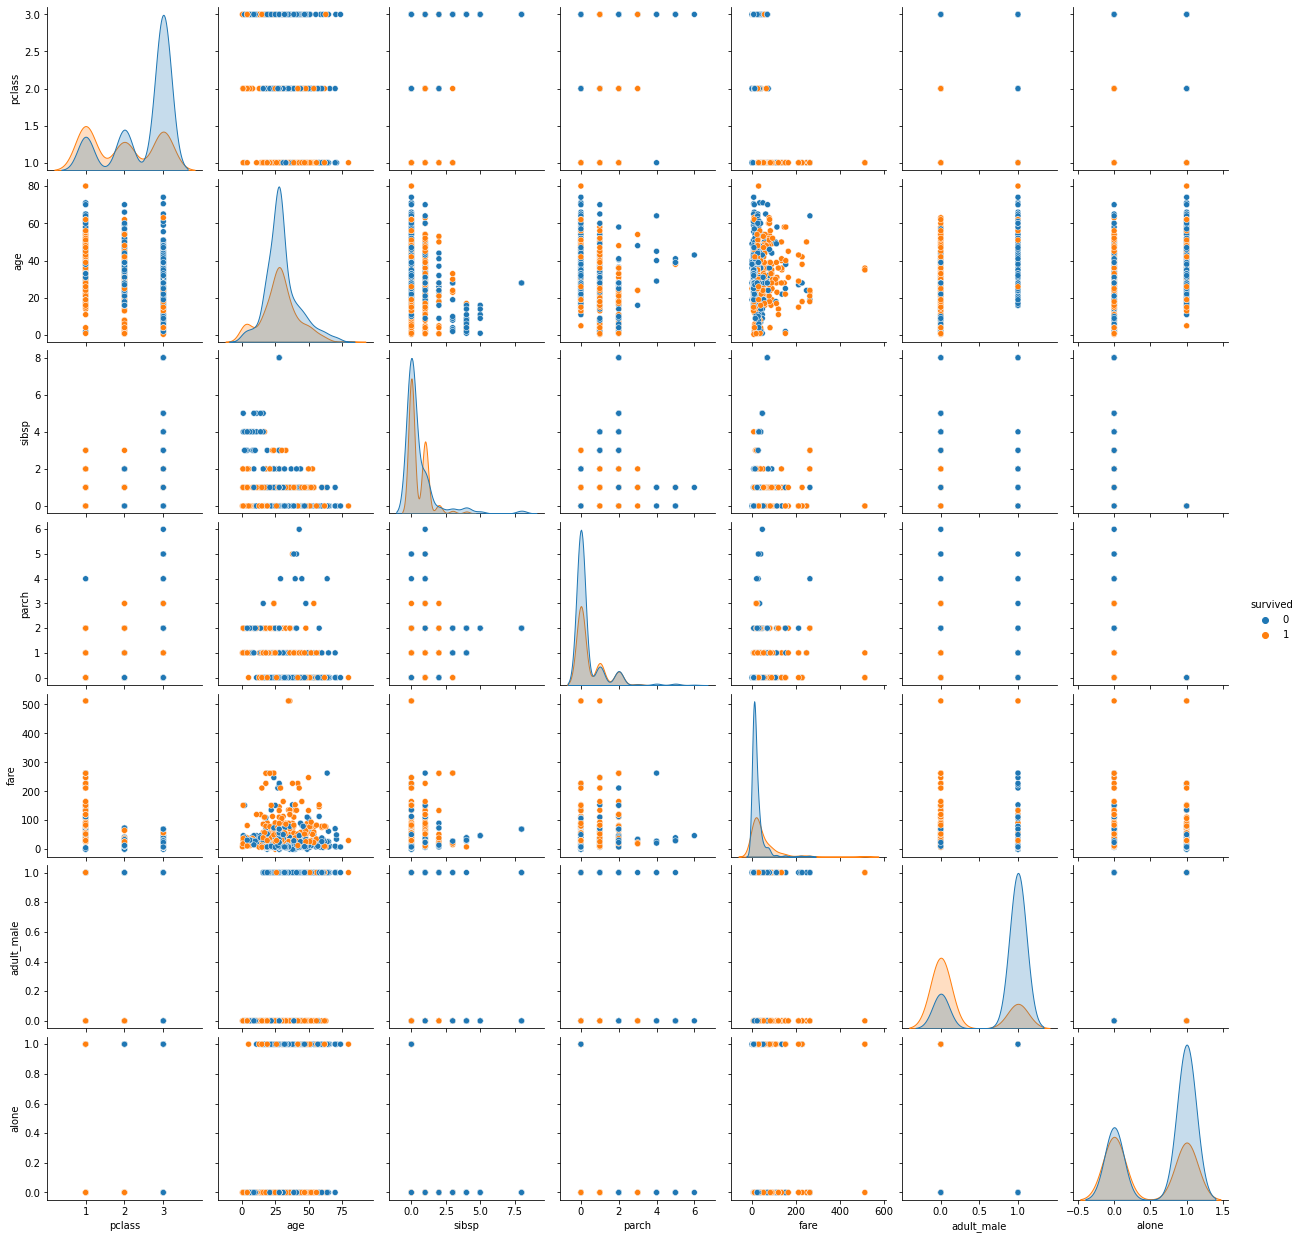

In [29]:
titanic_corr = titanic.corr(method='pearson') #피어슨 상관 계수 구하기 -> 관계의 강도
titanic['survived'].corr(titanic['adult_male']) #특정 변수 지정 가능
titanic['adult_male'] = titanic['adult_male'].astype(int) #boolen 값 때문에 에러 뜬 거였음
titanic['alone'] = titanic['alone'].astype(int)
sns.pairplot(titanic, hue='survived') #
plt.show()

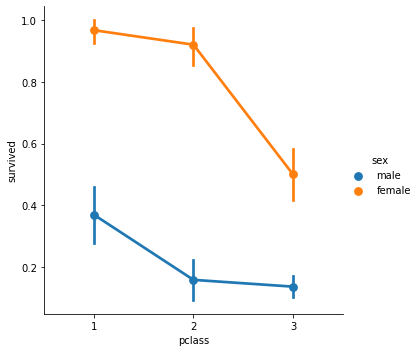

In [12]:
sns.catplot(x='pclass',y='survived',hue='sex',data=titanic,kind='point') #hue가 종속 변수
plt.show() #수치형 변수 시각화

In [26]:
if titanic['sex'][0] != 1:
    titanic['sex'] = titanic['sex'].map({'male' : 1, 'female': 0})
sns.heatmap(titanic.corr(), annot=True) #annot이 true면 값까지 -> 히트맵

AttributeError: module 'matplotlib.cm' has no attribute 'Rdy'

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

<AxesSubplot:>

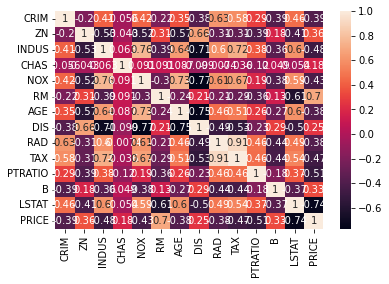

In [36]:
boston_df = pd.read_csv('./boston.csv')

boston_corr = boston_df.corr(method='pearson')
print(boston_corr)
sns.heatmap(boston_corr, annot=True)